In [3]:
import os
import pandas as pd 
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
import pltfont

In [5]:
pltfont.auto()

✅ 현재 폰트 적용됨: Arial Unicode MS


In [ ]:
list1 = pltfont.list_fonts()

1. Arial Unicode MS
2. DungGeunMo
3. Intel One Mono
Arial Unicode MS
DungGeunMo
Intel One Mono


In [6]:
data_path = "/Users/jun/GitStudy/commerceAB/data/thelook_ecommerce"
data_list = os.listdir(data_path)
data_list.sort()
data_list

['distribution_centers_gzip.parquet',
 'inventory_items_gzip.parquet',
 'order_items_gzip.parquet',
 'orders_gzip.parquet',
 'products_gzip.parquet',
 'users_gzip.parquet']

In [7]:
cols = [i.rstrip("_gzip.parquet") for i in data_list ]

cols

['distribution_centers',
 'inventory_items',
 'order_items',
 'orders',
 'products',
 'users']

In [8]:
users_file_path = data_path + "/users_gzip.parquet"
users_df = pd.read_parquet(users_file_path, engine='pyarrow')  # 또는 engine='fastparquet'

In [9]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   id              100000 non-null  Int64              
 1   age             100000 non-null  Int64              
 2   gender          100000 non-null  object             
 3   state           100000 non-null  object             
 4   city            100000 non-null  object             
 5   created_at      100000 non-null  datetime64[ns, UTC]
 6   traffic_source  100000 non-null  object             
dtypes: Int64(2), datetime64[ns, UTC](1), object(4)
memory usage: 5.5+ MB


In [10]:
users_df.describe(include='all',datetime_is_numeric=True)

,id,age,gender,state,city,created_at,traffic_source
count,100000.0,100000.0,100000,100000,100000,100000,100000
unique,<NA>,<NA>,2,229,7861,NaN,5
top,<NA>,<NA>,F,Guangdong,Shanghai,NaN,Search
freq,<NA>,<NA>,50142,5282,2498,NaN,70086
mean,50000.5,41.0062,NaN,NaN,NaN,2022-06-18 18:28:22.912000768+00:00,NaN
min,1.0,12.0,NaN,NaN,NaN,2019-01-02 01:00:00+00:00,NaN
25%,25000.75,26.0,NaN,NaN,NaN,2020-09-22 04:19:30+00:00,NaN
50%,50000.5,41.0,NaN,NaN,NaN,2022-06-19 04:15:00+00:00,NaN
75%,75000.25,56.0,NaN,NaN,NaN,2024-03-14 09:05:15+00:00,NaN
max,100000.0,70.0,NaN,NaN,NaN,2025-10-07 19:32:25.712857+00:00,NaN


In [11]:
users_df.isnull().sum()

id                0
age               0
gender            0
state             0
city              0
created_at        0
traffic_source    0
dtype: int64

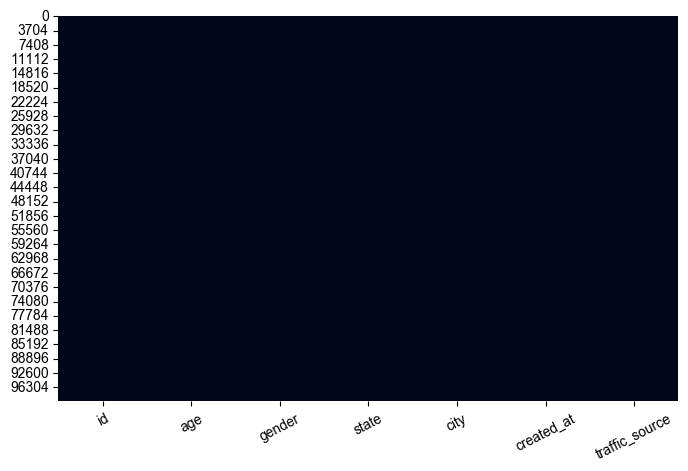

In [12]:
plt.figure(figsize=(8,5))  # 전체 그림 크기 지정
sns.heatmap(users_df.isnull(), cbar=False)
plt.xticks(rotation=27)  # x축 라벨 기울이기
plt.show()